<a href="https://colab.research.google.com/github/Indian966/JBNU_BigData_Analyze/blob/master/Starbucks_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"한 도시의 발전 수준은 (버거킹의 개수+맥도날드의 개수+KFC의 개수)/롯데리아의 개수를 계산하여 높게 나올수록 더 발전된 도시라고 할 수 있다"

"그렇다면 스타벅스는?"

In [23]:
import urllib.request
import json
import pandas as pd
import bs4
import numpy as np

In [2]:
CB = pd.read_csv('/content/starbucks_전처리.csv', encoding = 'CP949', index_col = 0, header = 0,engine = 'python')
CB.head()

,주소,위도,경도
지점명,,,
구로호텔,"서울특별시 구로구 디지털로32길 72, 구로호텔 1층 (구로동)",37.483129,126.898859
구로디지털타워,서울특별시 구로구 디지털로32길 30 (구로동),37.483432,126.896480
구로디지털로,"서울특별시 구로구 디지털로33길 11, 에이스테크노8차 1층 (구로동)",37.485911,126.895587
구로에이스,"서울특별시 구로구 디지털로 285, 에이스트윈타워1차 103호 (구로동)",37.484483,126.894496
구로하이엔드,"서울특별시 구로구 디지털로26길 5, 에이스하이엔드타워1차 103호 (구로동)",37.481618,126.893136


In [116]:
addr = pd.DataFrame(CB['주소'].apply(lambda v: v.split()[:2]).tolist(), columns = ('시도', '군구'))
addr['시도군구'] = addr.apply(lambda r: r['시도'] + ' ' + r['군구'], axis = 1)
addr['count'] = 0
addr_group = pd.DataFrame(addr.groupby(['시도', '군구', '시도군구'], as_index= False).count())
addr_group = addr_group.set_index("시도군구")

In [128]:
population = pd.read_excel('/content/행정구역_시군구_별__성별_인구수_2.xlsx')
population = population.rename(columns = {'행정구역(시군구)별(1)': '시도', '행정구역(시군구)별(2)': '군구'})
for element in range(0,len(population)):
  population['군구'][element] = population['군구'][element].strip()
population['시도군구'] = population.apply(lambda r: r['시도'] + ' ' + r['군구'], axis = 1)
population.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명),시도군구
0,전국,소계,51847509,25862863,25984646,전국 소계
1,서울특별시,소계,9733509,4745088,4988421,서울특별시 소계
2,서울특별시,종로구,151215,73688,77527,서울특별시 종로구
3,서울특별시,중구,126201,61946,64255,서울특별시 중구
4,서울특별시,용산구,229385,110701,118684,서울특별시 용산구


In [129]:
population = population[population.군구 != '소계']
population = population.set_index("시도군구")
addr_population_merge = pd.merge(addr_group,population, how = 'inner',left_index = True, right_index = True)
local_MC_Population = addr_population_merge[['시도_x', '군구_x','count', '총인구수 (명)']]

In [12]:
local_MC_Population = local_MC_Population.rename(columns = {'시도_x':'시도', '군구_x': '군구','총인구수 (명)': '인구수'})
MC_count = local_MC_Population['count']
local_MC_Population['MC_ratio'] = MC_count.div(local_MC_Population['인구수'], axis = 0)*100000
local_MC_Population.head()

,시도,군구,count,인구수,MC_ratio
시도군구,,,,,
강원도 강릉시,강원도,강릉시,5,213328,2.343809
강원도 고성군,강원도,고성군,1,27165,3.681207
강원도 동해시,강원도,동해시,1,90417,1.105987
강원도 속초시,강원도,속초시,3,81840,3.665689
강원도 원주시,강원도,원주시,5,350202,1.427747


In [13]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [14]:
from matplotlib import pyplot as plt
from matplotlib import rcParams, style
style.use('ggplot')
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = '/content/NanumBarunGothic.ttf').get_name()
rc('font', family = font_name)

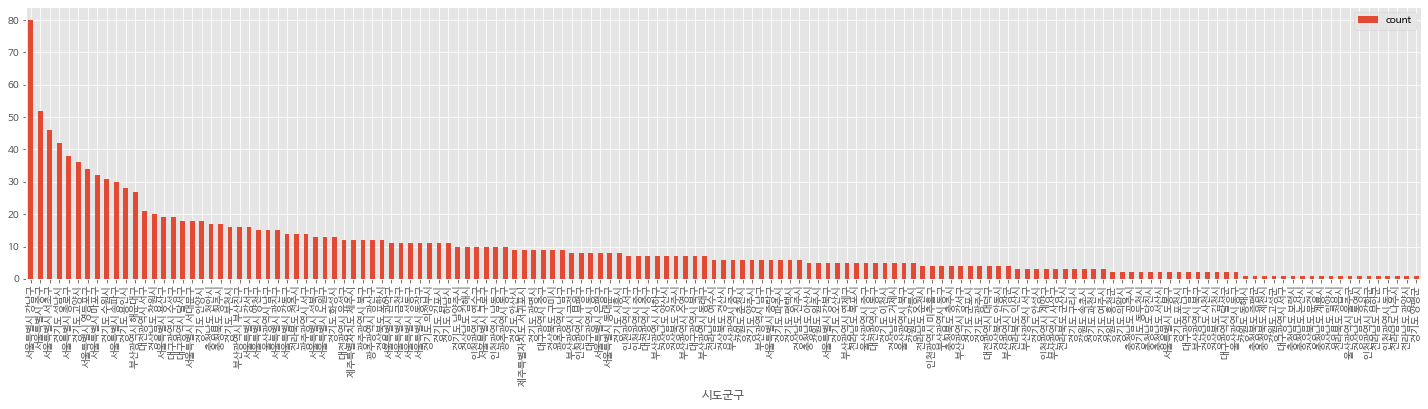

In [15]:
MC_ratio = local_MC_Population[['count']]
MC_ratio = MC_ratio.sort_values('count', ascending = False)
plt.rcParams["figure.figsize"] = (25, 5)
MC_ratio.plot(kind = 'bar', rot = 90)
plt.show()


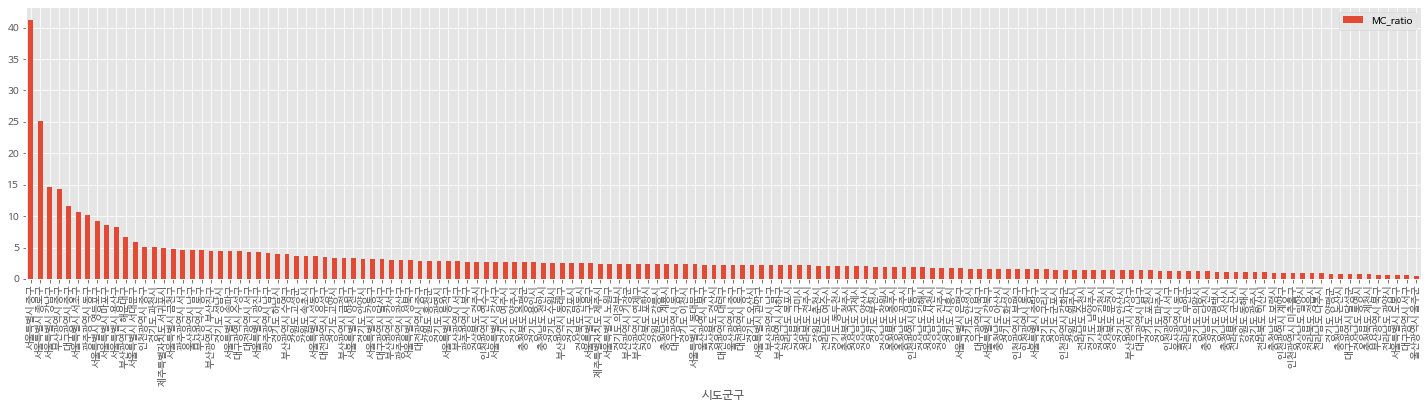

In [16]:
MC_ratio = local_MC_Population[['MC_ratio']]
MC_ratio = MC_ratio.sort_values('MC_ratio', ascending = False)
plt.rcParams["figure.figsize"] = (25, 5)
MC_ratio.plot(kind = 'bar', rot = 90)
plt.show()

In [130]:
data_draw_korea = pd.read_csv('/content/data_draw_korea.csv',index_col = 0, encoding = 'UTF-8', engine = 'python')
data_draw_korea['시도군구'] = data_draw_korea.apply(lambda r: r['광역시도'] + ' ' + r['행정구역'], axis = 1)
data_draw_korea = data_draw_korea.set_index("시도군구")
data_draw_korea.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
시도군구,,,,,,,
강원도 강릉시,202520,강릉,11,4,1040.07,강원도,강릉시
강원도 고성군,25589,고성(강원),9,0,664.19,강원도,고성군
강원도 동해시,86747,동해,11,5,180.01,강원도,동해시
강원도 삼척시,63986,삼척,11,8,1185.80,강원도,삼척시
강원도 속초시,76733,속초,9,1,105.25,강원도,속초시


In [90]:
data_draw_korea_MC_Population_all = pd.merge(data_draw_korea,local_MC_Population, how = 'outer', left_index = True, right_index = True)
data_draw_korea_MC_Population_all.head()

,인구수_x,shortName,x,y,면적,광역시도,행정구역,시도,군구,count,인구수_y,MC_ratio
시도군구,,,,,,,,,,,,
강원도 강릉시,202520.0,강릉,11.0,4.0,1040.07,강원도,강릉시,강원도,강릉시,5.0,213328.0,2.343809
강원도 고성군,25589.0,고성(강원),9.0,0.0,664.19,강원도,고성군,강원도,고성군,1.0,27165.0,3.681207
강원도 동해시,86747.0,동해,11.0,5.0,180.01,강원도,동해시,강원도,동해시,1.0,90417.0,1.105987
강원도 삼척시,63986.0,삼척,11.0,8.0,1185.80,강원도,삼척시,NaN,NaN,NaN,NaN,NaN
강원도 속초시,76733.0,속초,9.0,1.0,105.25,강원도,속초시,강원도,속초시,3.0,81840.0,3.665689


In [109]:
data_draw_korea_MC_Population_all[data_draw_korea_MC_Population_all['군구'] == '미추홀구'] 
s = pd.Series([])

,인구수_x,shortName,x,y,면적,광역시도,행정구역,시도,군구,count,인구수_y,MC_ratio
시도군구,,,,,,,,,,,,
인천광역시 미추홀구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,인천광역시,미추홀구,4.0,408394.0,0.979446


In [112]:
starbucks_map = pd.read_excel('/content/starbucks_data.xlsx', index_col = 0)
starbucks_map.head()

,인구수_x,shortName,x,y,면적,광역시도,행정구역,시도,군구,count,인구수_y,MC_ratio
시도군구,,,,,,,,,,,,
강원도 강릉시,202520,강릉,11,4,1040.07,강원도,강릉시,강원도,강릉시,5.0,213328.0,2.343809
강원도 고성군,25589,고성(강원),9,0,664.19,강원도,고성군,강원도,고성군,1.0,27165.0,3.681207
강원도 동해시,86747,동해,11,5,180.01,강원도,동해시,강원도,동해시,1.0,90417.0,1.105987
강원도 삼척시,63986,삼척,11,8,1185.80,강원도,삼척시,NaN,NaN,NaN,NaN,NaN
강원도 속초시,76733,속초,9,1,105.25,강원도,속초시,강원도,속초시,3.0,81840.0,3.665689


In [20]:
BORDER_LINES = [
[(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
[(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9),(4, 7), (1, 7)], # 서울
[(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),(9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
[(9, 12), (9, 10), (8, 10)], # 강원도
[(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5), (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
[(14, 4), (15, 4), (15, 6)], # 대전시
[(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
[(14, 8), (16, 8), (16, 10), (15, 10), (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
[(15, 11), (16, 11), (16, 13)], # 울산시
[(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
[(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], #광주시
[(18, 5), (20, 5), (20, 6)], # 전라남도
[(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], #부산시
]

In [107]:
def draw_blockMap(blockedMap, targetData, title, color ):
  whitelabelmin = (max(blockedMap[targetData]) -
  min(blockedMap[targetData])) * 0.25 +  min(blockedMap[targetData])
  datalabel = targetData
  vmin = min(blockedMap[targetData])
  vmax = max(blockedMap[targetData])
  mapdata = blockedMap.pivot(index = 'y', columns = 'x', values = targetData)
  masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
  plt.figure(figsize = (8, 13))
  plt.title(title)
  plt.pcolor(masked_mapdata, vmin = vmin, vmax = vmax, cmap =color, edgecolor = '#aaaaaa', linewidth = 0.5)
#지역 이름 표시
  for idx, row in blockedMap.iterrows():
    annocolor = 'white' if row[targetData] > whitelabelmin else'black'
    #광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시
    if row['광역시도'].endswith('시') and not row['광역시도'].startswith('세종'):
      dispname = '{}\n{}'.format(row['광역시도'][:2], row['행정구역'][:-1])
    if len(row['행정구역']) <= 2:
      dispname += row['행정구역'][-1]
    else:
      dispname = row['행정구역'][:-1]
    if len(dispname.splitlines()[-1]) >= 3:
      fontsize, linespacing = 9.5, 1.5
    else:
      fontsize, linespacing = 11, 1.2
    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight = 'bold',fontsize = fontsize, 
                 ha = 'center', va = 'center', color = annocolor,linespacing = linespacing)
#시도 경계를 그린다.
  for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c = 'black', lw = 4)
  plt.gca().invert_yaxis()
  plt.gca().set_aspect(1)
  plt.axis('off')
  cb = plt.colorbar(shrink = 1, aspect = 10)
  cb.set_label(datalabel)
  plt.tight_layout()
  plt.savefig('.\\9장_data\\' + 'blockMap_' + targetData + '.png')
  plt.show()

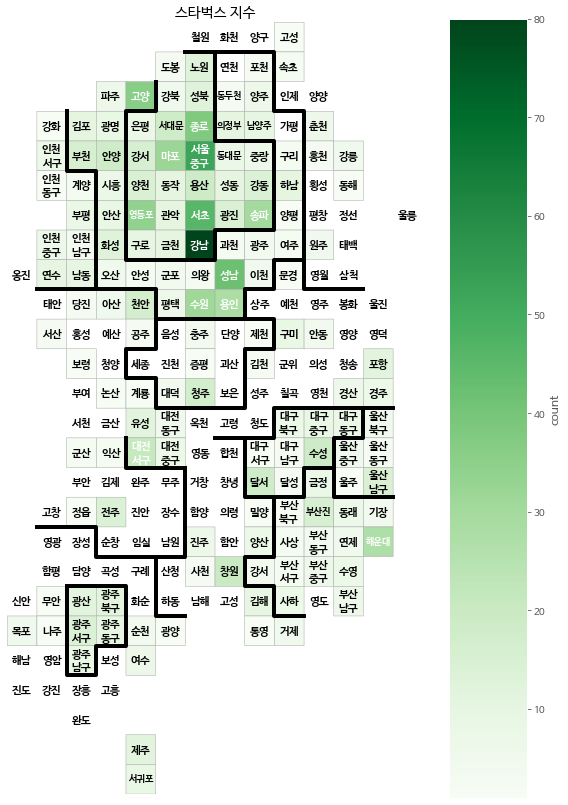

In [115]:
draw_blockMap(starbucks_map, 'count', '스타벅스 지수', 'Greens')
